In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
import pandas as pd
df = pd.read_csv("gdrive/My Drive/Colab Notebooks/Capstone/ForEx_Dataset.csv")

In [ ]:
df.head(5)

,Date,USD,AUS,CAN,SWF,DKK,EUR,GBP,HKD,IDR,...,ISK,MXN,PHP,PKR,PLN,RUB,SAR,TRY,VEF,BHD
0,29-12-2023,83.186,56.679,62.821,98.871,12.3174,88.962,105.922,10.6569,0.005405,...,0.6117,4.8961,1.5014,0.2990,21.11,0.9321,22.18,2.82,2.32,220.640
1,28-12-2023,83.169,56.796,62.850,98.448,12.3411,89.245,105.874,10.6433,0.005341,...,0.6122,4.8998,1.4945,0.2939,21.20,0.9397,22.18,2.82,2.32,220.578
2,27-12-2023,83.263,56.993,63.025,98.722,12.4011,89.069,106.534,10.6607,0.005414,...,0.6129,4.9187,1.4962,0.2949,21.39,0.9087,22.20,2.83,2.31,220.819
3,26-12-2023,83.158,56.747,63.018,97.398,12.3155,89.258,105.827,10.6495,0.005399,...,0.6094,4.8957,1.4989,0.2945,21.21,0.9074,22.17,2.84,2.31,220.508
4,25-12-2023,83.164,56.518,62.756,97.086,12.2775,89.081,105.527,10.6451,0.005377,...,0.6076,4.8777,1.5009,0.2976,21.06,0.9039,22.17,2.83,2.32,220.588


In [ ]:
df = df[['Date', 'EUR']]

In [ ]:
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date',inplace=True)
df_month = df.resample('MS').mean()
#df_month = df_month[df_month.index >= '2015-01-01']
print('Count of The Monthly Data Frame : ',df_month.shape[0])
df_month.head()

Count of The Monthly Data Frame :  216


,EUR
Date,
2006-01-01,57.925705
2006-02-01,56.614100
2006-03-01,54.745913
2006-04-01,54.498175
2006-05-01,55.254043


<Axes: xlabel='Date'>

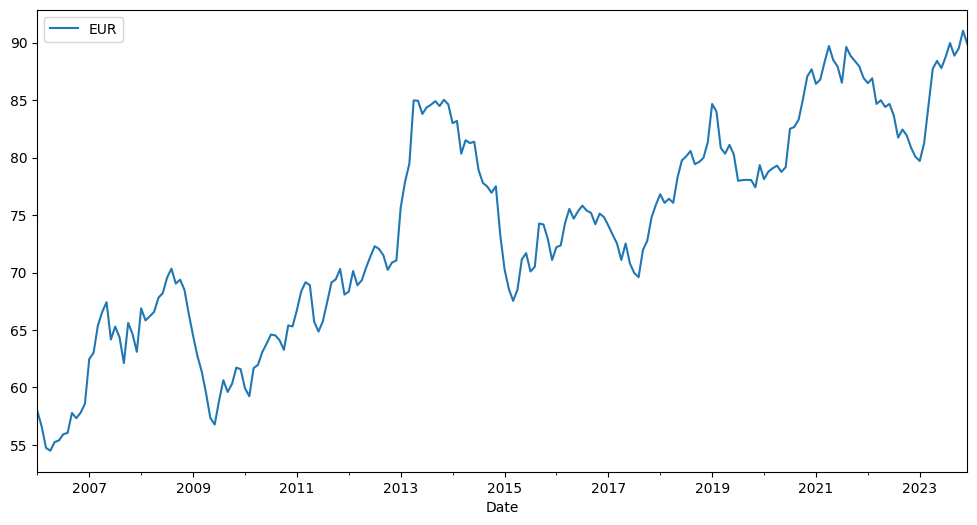

In [ ]:
df_month.plot()

In [ ]:
from statsmodels.tsa.stattools import adfuller
x=df_month['EUR']
result=adfuller(x)
print("ADF Stataics ",result[0])
print("p-value",result[1])
print("critical values",result[5])
if result[1]<=0.05:
    print("fail to reject null hypothese h1 , it mean data is stationary")
else:
    print("Reject the null hypotheise , it mean data is not stationary")

ADF Stataics  -1.5489065573711889
p-value 0.5091943388256092
critical values 728.8713238915406
Reject the null hypotheise , it mean data is not stationary


In [ ]:
df_month['EUR_1']=df_month['EUR']-df_month['EUR'].shift(1)

<Axes: xlabel='Date'>

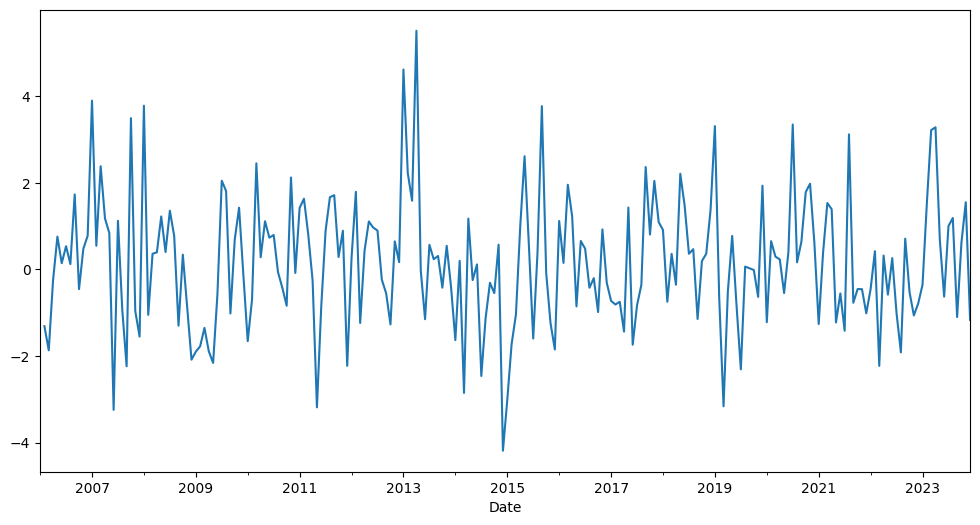

In [ ]:
df_month['EUR_1'].plot()

In [ ]:
x=df_month['EUR_1'].dropna()
result=adfuller(x)
print("ADF Stataics ",result[0])
print("p-value",result[1])
print("critical values",result[5])
if result[1]<=0.05:
    print("fail to reject null hypothese h1 , it mean data is stationary")
else:
    print("Reject the null hypotheise , it mean data is not stationary")

ADF Stataics  -12.25426897366176
p-value 9.387713653493016e-23
critical values 725.4141826431996
fail to reject null hypothese h1 , it mean data is stationary


In [ ]:
!pip install pmdarima

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 10.7 MB/s eta 0:00:00


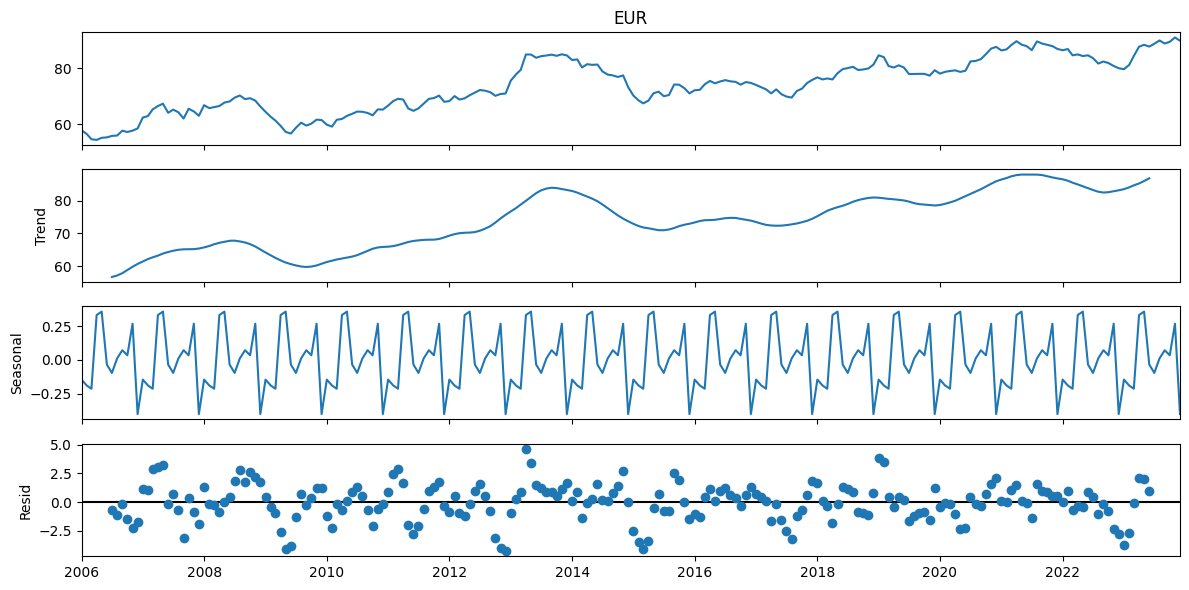

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import seaborn as sns
%matplotlib inline
import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima.model import ARIMA
from pmdarima import auto_arima
from statsmodels.graphics.tsaplots import plot_acf , plot_pacf
from pandas.plotting import autocorrelation_plot
from statsmodels.tsa.stattools import adfuller
from math import sqrt
from sklearn.metrics import r2_score , mean_absolute_error , mean_absolute_percentage_error , mean_squared_error
import pickle
import warnings
warnings.filterwarnings('ignore')
from statsmodels.tsa.seasonal import seasonal_decompose
plt.rcParams['figure.figsize']=(12,6)
decomposition = seasonal_decompose(df_month['EUR'] , period = 12, model = 'additive')
decomposition.plot()
plt.savefig('Discription , trend , seasonal , residuals.png')
plt.show()

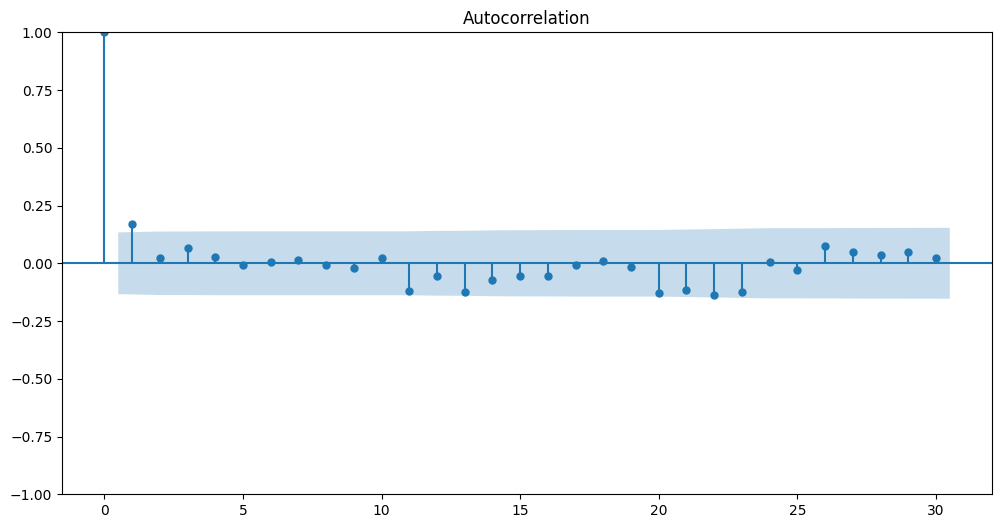

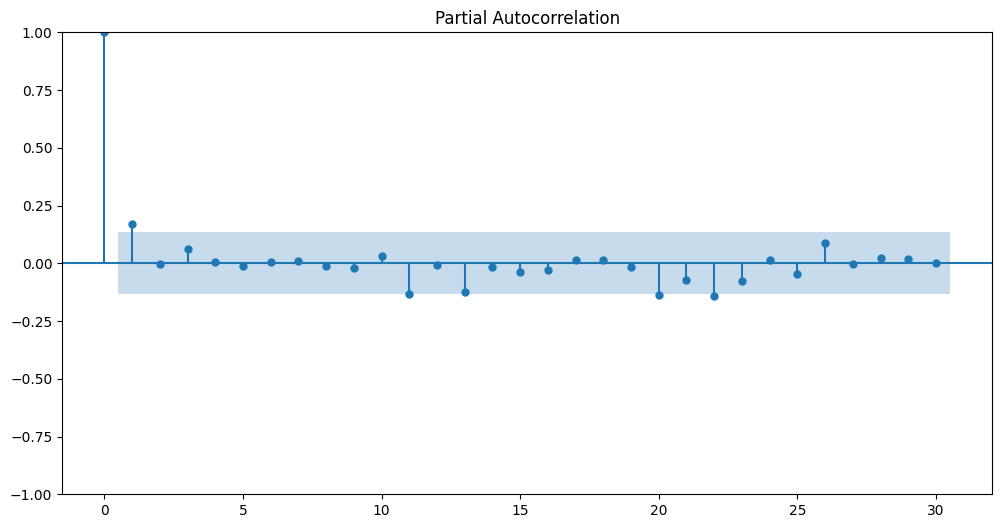

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
import matplotlib.pyplot as plt

plot_acf(df_month['EUR_1'].iloc[1:],lags=30)
plot_pacf(df_month['EUR_1'].iloc[1:],lags=30)
plt.show()

In [ ]:
from statsmodels.tsa.arima.model import ARIMA
from pmdarima import auto_arima

model = auto_arima(df_month['EUR'] , m = 12 , d = 1 ,seasonal = True, max_order=8, test = 'adf' , trace = True)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[12] intercept   : AIC=791.646, Time=0.80 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=786.785, Time=0.03 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=784.346, Time=0.16 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=784.360, Time=0.18 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=786.901, Time=0.03 sec
 ARIMA(1,1,0)(0,0,0)[12] intercept   : AIC=782.415, Time=0.05 sec
 ARIMA(1,1,0)(0,0,1)[12] intercept   : AIC=784.351, Time=0.16 sec
 ARIMA(1,1,0)(1,0,1)[12] intercept   : AIC=786.310, Time=0.53 sec
 ARIMA(2,1,0)(0,0,0)[12] intercept   : AIC=784.411, Time=0.06 sec
 ARIMA(1,1,1)(0,0,0)[12] intercept   : AIC=784.401, Time=0.22 sec
 ARIMA(0,1,1)(0,0,0)[12] intercept   : AIC=782.417, Time=0.10 sec
 ARIMA(2,1,1)(0,0,0)[12] intercept   : AIC=786.237, Time=0.34 sec
 ARIMA(1,1,0)(0,0,0)[12]             : AIC=781.848, Time=0.03 sec
 ARIMA(1,1,0)(1,0,0)[12]             : AIC=783.820, Time=0.07 sec
 ARIMA(1,1,0)(0,0,1)[12]         

In [ ]:
import statsmodels.api as sm
model=sm.tsa.statespace.SARIMAX(df_month['EUR'],order=(3,1,0),seasonal_order=(4,1,4,12), enforce_stationarity=False,
                                  enforce_invertibility=False)
result=model.fit(disp=False)

In [ ]:
predictions = result.predict(typ = 'levels')

In [ ]:
from math import sqrt
from sklearn.metrics import r2_score , mean_absolute_error , mean_absolute_percentage_error , mean_squared_error

print('Evaluation Result for whole data : ','\n')
print('R2 Score for whole data : {0:.2f} %'.format(100*r2_score(df_month['EUR'],predictions)),'\n')
print('Mean Squared Error : ',mean_squared_error(df_month['EUR'],predictions),'\n')
print('Mean Absolute Error : ',mean_absolute_error(df_month['EUR'],predictions),'\n')
print('Root Mean Squared Error : ',sqrt(mean_squared_error(df_month['EUR'],predictions)),'\n')
print('Mean Absolute Percentage Error : {0:.2f} %'.format(100*mean_absolute_percentage_error(df_month['EUR'],predictions)))

Evaluation Result for whole data :  

R2 Score for whole data : 74.55 % 

Mean Squared Error :  22.227705176898237 

Mean Absolute Error :  1.665653574332673 

Root Mean Squared Error :  4.714626727207387 

Mean Absolute Percentage Error : 2.46 %


<Axes: xlabel='Date'>

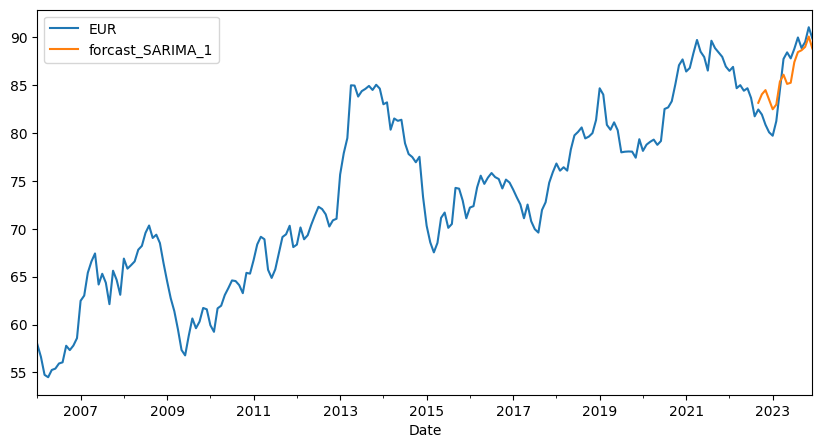

In [ ]:
df_month['forcast_SARIMA_1']=result.predict(start=200, end= 216,dynamic=True)
df_month[['EUR','forcast_SARIMA_1']].plot(figsize=(10, 5))

In [ ]:
import datetime
from dateutil.relativedelta import relativedelta

start = datetime.datetime.strptime("01-01-2024", "%d-%m-%Y")
date_list = [start + relativedelta(months=x) for x in range(0, 36)]
future_prediction = pd.DataFrame(index=date_list, columns=df_month.columns)
df_month = pd.concat([df_month, future_prediction])

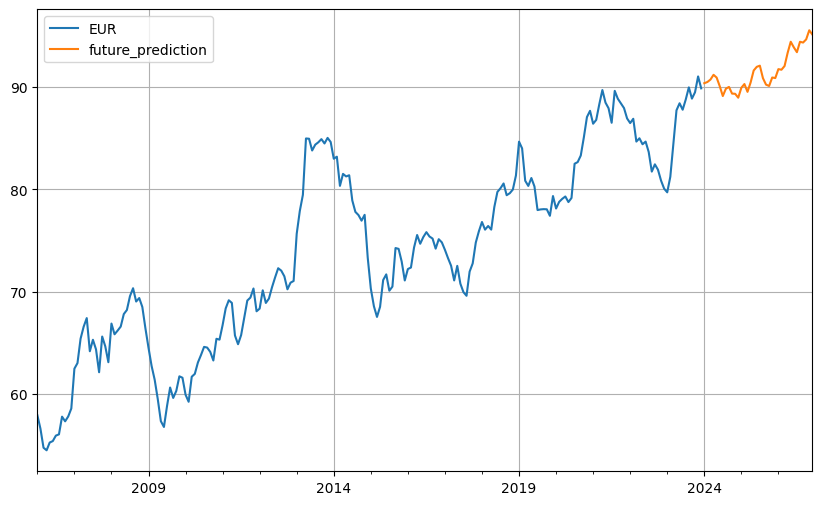

In [ ]:
df_month['future_prediction']=result.predict(start=216, end=255,dynamic=True)
df_month[['EUR','future_prediction']].plot(figsize=(10, 6))
plt.grid(True)

In [ ]:
filtered_df = df_month['2023':'2026']
filtered_df

,EUR,forcast_SARIMA_1,future_prediction
2023-01-01,79.712000,82.475953,NaN
2023-02-01,81.233600,82.965854,NaN
2023-03-01,84.449130,85.359708,NaN
2023-04-01,87.729750,86.084012,NaN
2023-05-01,88.416435,85.121598,NaN
2023-06-01,87.786227,85.244950,NaN
2023-07-01,88.785476,87.395035,NaN
2023-08-01,89.972217,88.445769,NaN
2023-09-01,88.871524,88.636055,NaN
2023-10-01,89.491182,88.988287,NaN


In [ ]:
df_month.to_csv("gdrive/My Drive/Colab Notebooks/Capstone/Sarima_EUR.csv", index=True)

In [ ]:
import datetime
from dateutil.relativedelta import relativedelta

start = datetime.datetime.strptime("01-01-2024", "%d-%m-%Y")
date_list = [start + relativedelta(months=x) for x in range(0, 36)]
future_prediction = pd.DataFrame(index=date_list, columns=df_month.columns)
df_month = pd.concat([df_month, future_prediction])

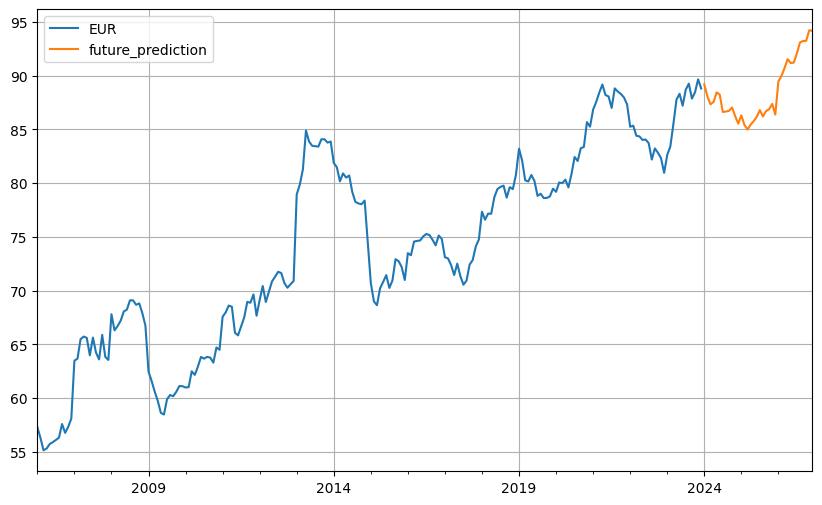

In [ ]:
df_month['future_prediction']=result.predict(start=216, end=255,dynamic=True)
df_month[['EUR','future_prediction']].plot(figsize=(10, 6))
plt.grid(True)

In [ ]:
filtered_df = df_month['2023':'2026']

In [ ]:
filtered_df

,EUR,forcast_SARIMA_1,future_prediction
2023-01-01,82.621905,85.094306,NaN
2023-02-01,83.394550,85.665916,NaN
2023-03-01,85.499750,86.323732,NaN
2023-04-01,87.764850,87.001427,NaN
2023-05-01,88.301238,87.339942,NaN
2023-06-01,87.194333,87.408690,NaN
2023-07-01,88.687136,87.768958,NaN
2023-08-01,89.247909,87.959102,NaN
2023-09-01,87.854810,88.084567,NaN
2023-10-01,88.443136,88.409069,NaN


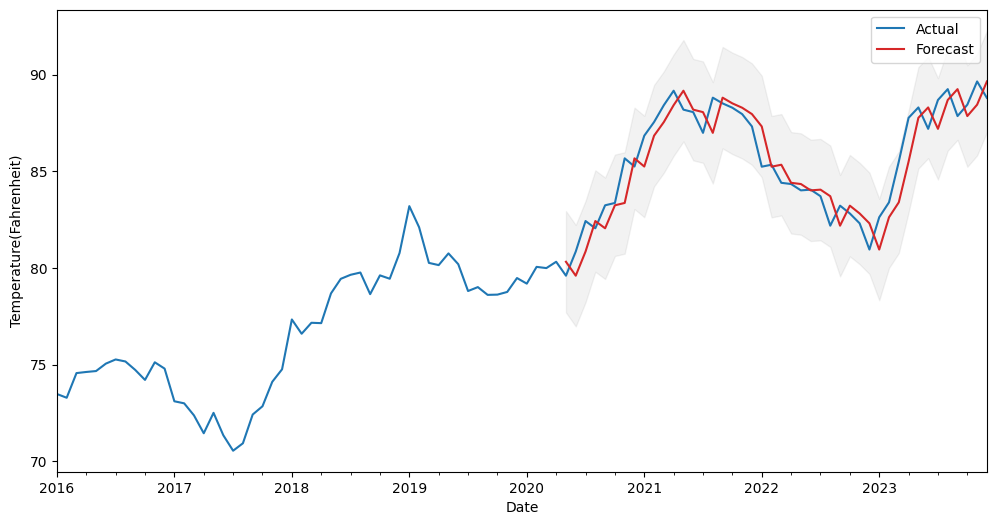

In [ ]:
ax = df_month.EUR['2016':].plot(label='Actual', color='tab:blue')
pred.predicted_mean.plot(ax=ax, label='Forecast', color='tab:red')

ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.05)
ax.set_xlabel('Date')
ax.set_ylabel('Temperature(Fahrenheit)')
plt.legend()
plt.show()

In [ ]:
predictions = result.predict(typ = 'levels')

In [ ]:
from math import sqrt
from sklearn.metrics import r2_score , mean_absolute_error , mean_absolute_percentage_error , mean_squared_error

print('Evaluation Result for whole data : ','\n')
print('R2 Score for whole data : {0:.2f} %'.format(100*r2_score(df_month['EUR'],predictions)),'\n')
print('Mean Squared Error : ',mean_squared_error(df_month['EUR'],predictions),'\n')
print('Mean Absolute Error : ',mean_absolute_error(df_month['EUR'],predictions),'\n')
print('Root Mean Squared Error : ',sqrt(mean_squared_error(df_month['EUR'],predictions)),'\n')
print('Mean Absolute Percentage Error : {0:.2f} %'.format(100*mean_absolute_percentage_error(df_month['EUR'],predictions)))

Evaluation Result for whole data :  



ValueError: Found input variables with inconsistent numbers of samples: [360, 324]

In [ ]:
import datetime
from dateutil.relativedelta import relativedelta

start = datetime.datetime.strptime("01-01-2024", "%d-%m-%Y")
date_list = [start + relativedelta(months=x) for x in range(0, 36)]
future_prediction = pd.DataFrame(index=date_list, columns=df_month.columns)
df_month = pd.concat([df_month, future_prediction])

In [ ]:
df_month['future_prediction']=result.predict(start=216, end=255,dynamic=True, typ='levels')
df_month[['EUR','future_prediction']].plot(figsize=(10, 6))
plt.grid(True)

AttributeError: 'tuple' object has no attribute 'predict'